## ASTR 21000, Winter 2020

## Homework Assignment 3 (60 points)

In [86]:
import numpy as np

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
plot_pretty(fontsize=12)

from codes.plot_utils import plot_histogram 
plot_pretty(fontsize=12)

## Exercise 1: 1D and 2D histograms of data. (20 points)
## Task 1a. (5 points)

In [87]:
from astropy.io import fits

hdulist = fits.open('data/sdss_galaxies.fits') 

# data table in the FITS is a dictionary, which we will convert to the numpy dictionary (record)
data = np.asarray(hdulist[1].data)
zmin, zmax = 0.01, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
# g-r color of all galaxies in the selected subsample
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]

### Changing the number of bins

When more bins are used, the histogram is more descriptive about the distribution of $g-r$ colors. For example, with more bins, it is more obvious that the distribution is skewed to the right and is not symmetrical around the peak. However, the overall appearance of the histogram is somewhat similar when a large enough number of bins is used.

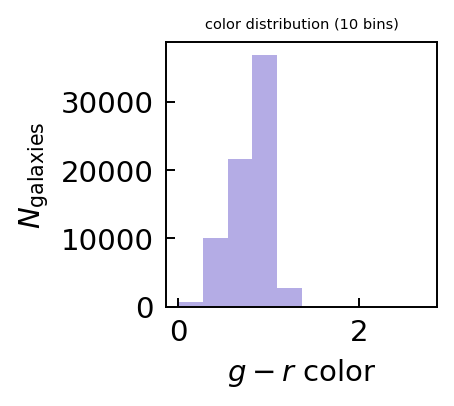

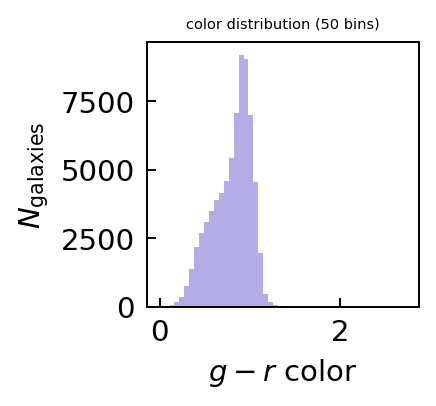

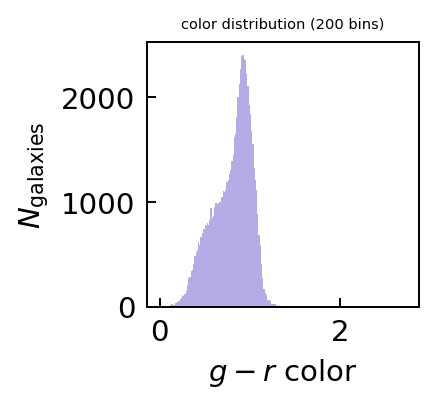

In [89]:
plot_histogram(gr_sub, bins=10, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution (10 bins)', figsize=2.0)
plot_histogram(gr_sub, bins=50, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution (50 bins)', figsize=2.0)
plot_histogram(gr_sub, bins=200, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution (200 bins)', figsize=2.0)

### Testing different bin parameters

Using the <tt>'fd'</tt> and <tt>'scott'</tt> bin parameter options results in histograms with many bins so there is more information about the underlying distribution. In comparison, using the <tt>'sturges'</tt> option uses much fewer bins, which allows us to see a more general shape - the main peak is still visible but the shape on the left hand side is not noticeable.

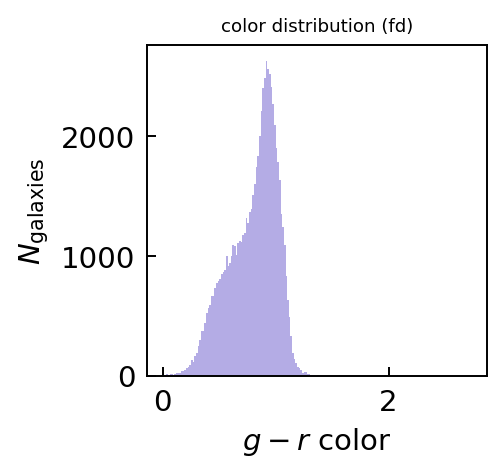

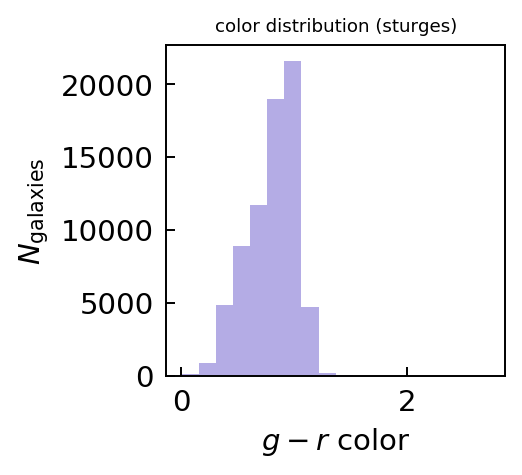

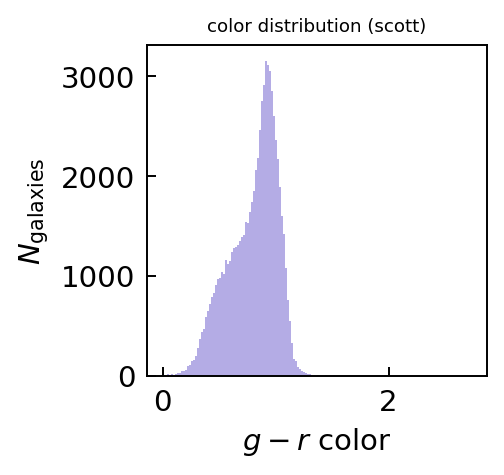

In [90]:
gr_sub = gr[(gr < 3) & (gr > 0)] #subset g-r color range to (0,2)
plot_histogram(gr_sub, bins='fd', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution (fd)', figsize=2.5)
plot_histogram(gr_sub, bins='sturges', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution (sturges)', figsize=2.5)
plot_histogram(gr_sub, bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution (scott)', figsize=2.5)

## Task 1b. (5 points) 

The distribution in 1a is skewed to the left and has one peak around 1. In the plots below, we can see that changing the redshift range (<tt>zmin, zmax</tt>) and range of $r$-band magnitude (<tt>rmin, rmax</tt>) changes the distribution.

Plots 1 and 3 indicate significantly different distributions using smaller z-values (using range from 0.01 to 0.05) and $r$-band range with all/only large (from 15 to 20) values results in a distribution with 2 peaks: a larger peak around 0.4 and a smaller peak around 0.7. This is very different from the distribution above that just has one peak. The distribution is also somewhat skewed to the right.

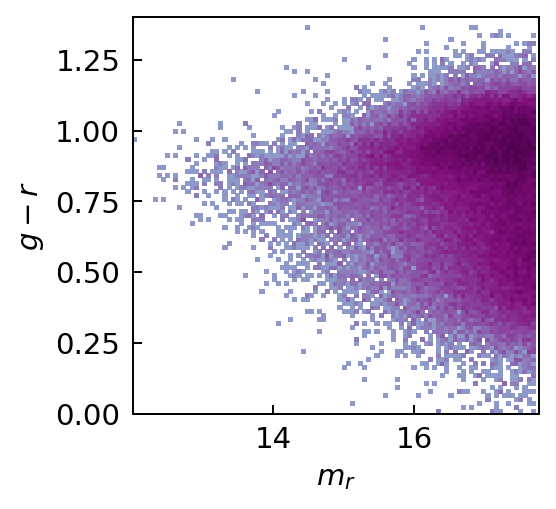

In [91]:
from codes.plot_utils import plot_2d_dist

plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))


zmin: 0.01 zmax: 0.05 rmin: 12.0 rmax: 17.77


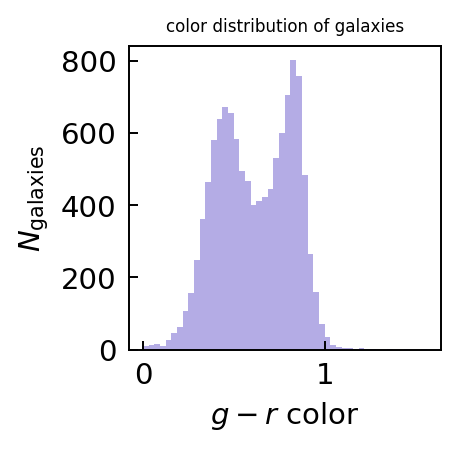

zmin: 0.01 zmax: 0.05 rmin: 12 rmax: 15


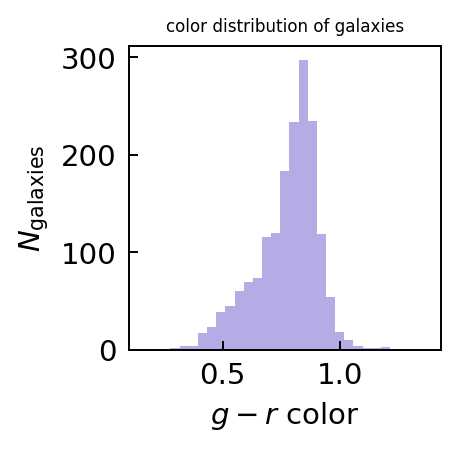

zmin: 0.01 zmax: 0.05 rmin: 15 rmax: 20


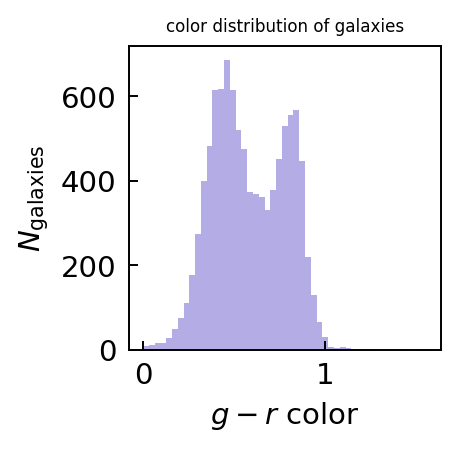

zmin: 0.05 zmax: 0.1 rmin: 12.0 rmax: 17.77


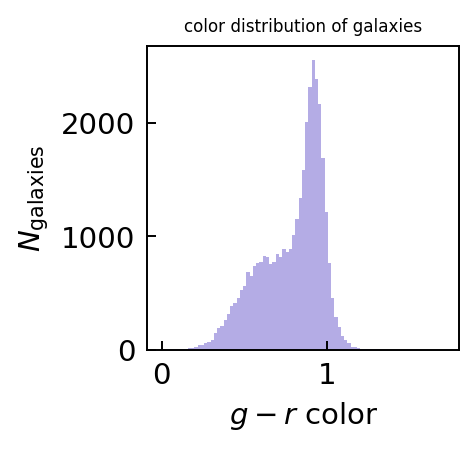

zmin: 0.05 zmax: 0.1 rmin: 12 rmax: 15


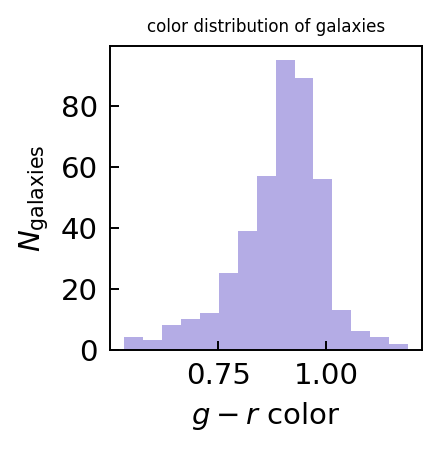

zmin: 0.05 zmax: 0.1 rmin: 15 rmax: 20


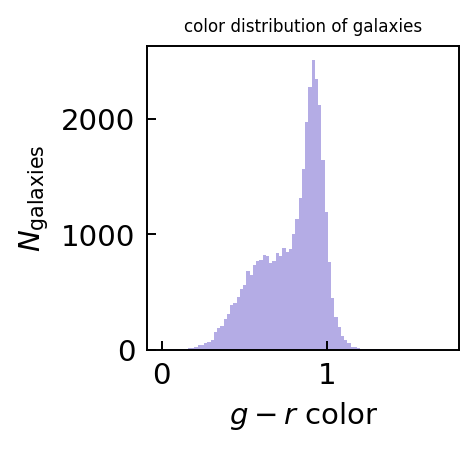

zmin: 0.1 zmax: 0.14 rmin: 12.0 rmax: 17.77


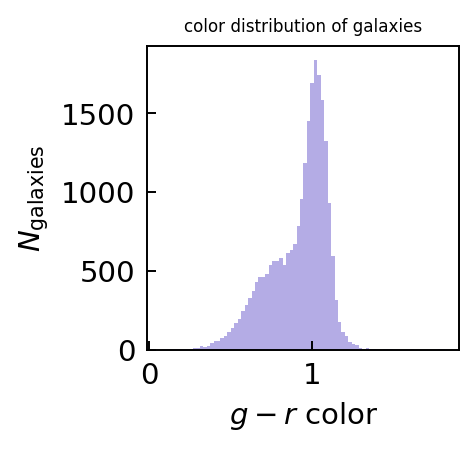

zmin: 0.1 zmax: 0.14 rmin: 12 rmax: 15


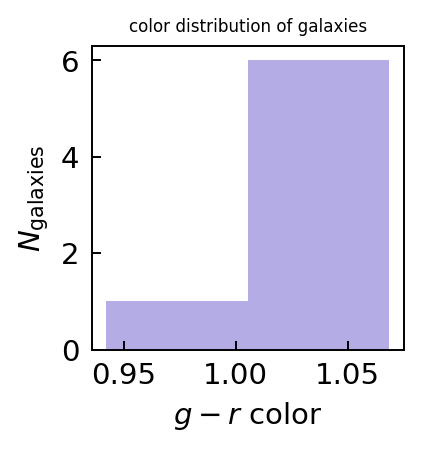

zmin: 0.1 zmax: 0.14 rmin: 15 rmax: 20


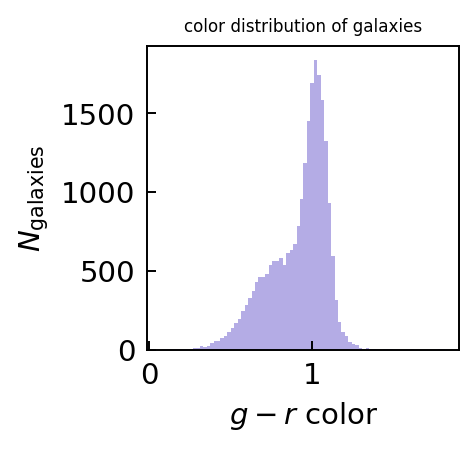

In [92]:
zArr = [[0.01, 0.05], [0.01, 0.05], [0.01, 0.05],
        [0.05, 0.10], [0.05, 0.10], [0.05, 0.10],
       [0.10, 0.14], [0.10, 0.14],[0.10, 0.14]]
rArr = [[12.,17.77], [12, 15], [15,20],
        [12.,17.77], [12, 15], [15,20],
        [12.,17.77], [12, 15], [15,20]]
for i in range(len(zArr)):
    isel_new = ((data['r'] > rArr[i][0]) & (data['r'] < rArr[i][1]) & (data['z'] > zArr[i][0]) & (data['z'] < zArr[i][1]))
    mr_new = data['r'][isel_new]
    gr_new = data['g'][isel_new] - data['r'][isel_new]
    print("zmin:",zArr[i][0],"zmax:",zArr[i][1],"rmin:",rArr[i][0],"rmax:",rArr[i][1])
    plot_histogram(gr_new[(gr_new < 2.) & (gr_new > 0)], bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=2.3)

**Task 1c** (5 points). I am testing if the structure of the two peaks in the distribution -- found using z-range (0.01, 0.05) and $r$-band range (12.,17.77) -- is real using the Shimazaki-Shinomoto method and Knuth method. Both methods result in histograms that still have the structure with two peaks: one around 0.4 and the other around 0.7. These results make sense since the methods are supposed to use the minimum number of bins that will still show the real structure of the distribution. Note that I am just using the subset of data for which $g-r$ is in range (0,2).

number of bins according to Shimazaki-Shinomoto method is 63


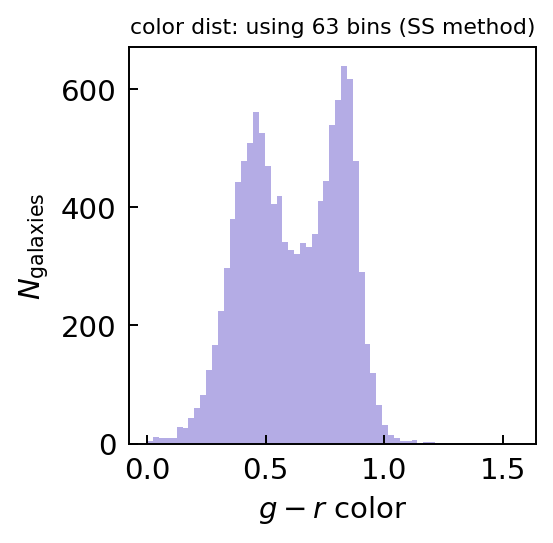

In [95]:
from codes.histtools import shimazaki_shinomoto_rule

zminNew, zmaxNew = 0.01, 0.05
rminNew, rmaxNew = 12.,17.77

iselNew = ((data['r'] > rminNew) & (data['r'] < rmaxNew) & (data['z'] > zminNew) & (data['z'] < zmaxNew))
mrNew = data['r'][iselNew]
grNew = data['g'][iselNew] - data['r'][iselNew]

nss, hss = shimazaki_shinomoto_rule(grNew[(grNew < 2.) & (grNew > 0)], Nbmin=4, Nbmax=500)

print("number of bins according to Shimazaki-Shinomoto method is %d"%nss)
plot_histogram(grNew[(grNew < 2.) & (grNew > 0)], bins=nss, xlabel=r'$g-r\ \rm color$',
               ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color dist: using 63 bins (SS method)', figsize=3.0)

Optimization terminated successfully.
         Current function value: -8243.890421
         Iterations: 17
         Function evaluations: 48
number of bins according to Knuth method is 49


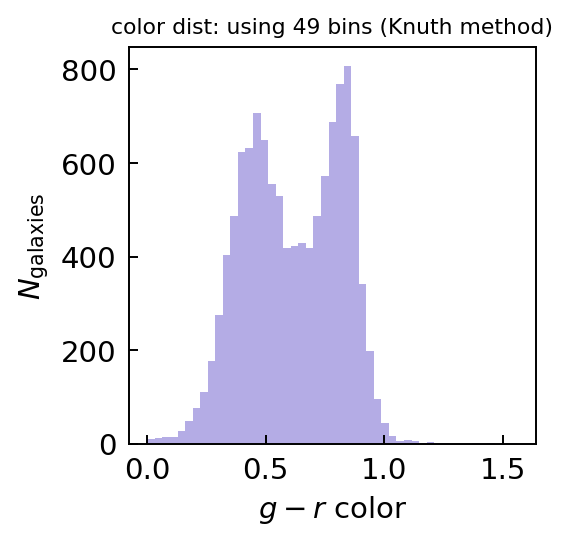

In [96]:
from codes.histtools import knuth_bin_width

h_knuth, bins_knuth = knuth_bin_width(grNew[(grNew < 2.) & (grNew > 0)], return_bins=True)

n_knuth = np.shape(bins_knuth)[0] - 1
print("number of bins according to Knuth method is %d"%n_knuth)

plot_histogram(grNew[(grNew < 2.) & (grNew > 0)], bins=n_knuth, xlabel=r'$g-r\ \rm color$',
               ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color dist: using 49 bins (Knuth method)', figsize=3.0)

### Task 1d. (5 points). 

The plots below show the histogram of galaxies in the $m_r-(g-r)$ with bins suggested by the Shimazaki-Shinomoto rule (above) and Knuth rule (below). plane suggested in the Task 1b above and show the corresponding plot (3 points). 

Although the rule for choosing the number of bins does produce plots that suggest a skewed distribution with a stronger peak (darker colors), I am not sure that this is the best method. The Shimazaki-Shinomoto and Knuth rule are designed to select the smallest number of bins which can be useful to minimize computation time, but I think for a 2D distribution, more information is more useful if possible. For example, it is harder to notice the second peak (the second darker spot) when fewer bins are used with the Knuth rule.


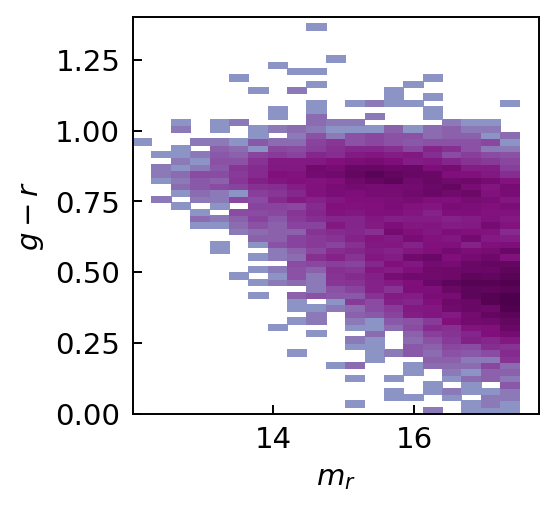

Optimization terminated successfully.
         Current function value: -61196.782051
         Iterations: 23
         Function evaluations: 61
number of mr bins according to Knuth method is 37
Optimization terminated successfully.
         Current function value: -8243.890421
         Iterations: 17
         Function evaluations: 48
number of [g-r]bins according to Knuth method is 49


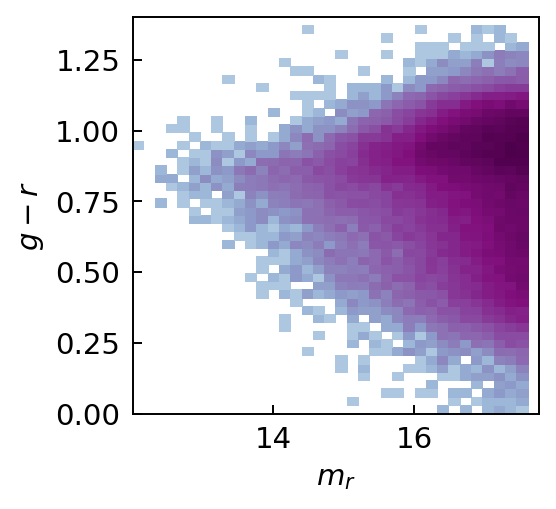

In [100]:
#2D histogram using Shimazaki-Shinomoto rule
gr_sub = grNew[(grNew < 2.) & (grNew > 0)]
mr_sub = mrNew[(grNew < 2.) & (grNew > 0)]
mr_ss, mr_hss = shimazaki_shinomoto_rule(mr_sub, Nbmin=4, Nbmax=500)
gr_ss, gr_hss = shimazaki_shinomoto_rule(gr_sub, Nbmin=4, Nbmax=500)
plot_2d_dist(mr_sub, gr_sub, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=mr_ss, nybins=gr_ss, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

#2D histogram using Knuth method
#Choose number of bins for mr
mr_h_knuth, mr_bins_knuth = knuth_bin_width(mr, return_bins=True)
mr_knuth = np.shape(mr_bins_knuth)[0] - 1
print("number of mr bins according to Knuth method is %d"%mr_knuth)
#Choose number of bins for gr
gr_h_knuth, gr_bins_knuth = knuth_bin_width(gr_sub, return_bins=True)
gr_knuth = np.shape(gr_bins_knuth)[0] - 1
print("number of [g-r]bins according to Knuth method is %d"%gr_knuth)
#Show 2-dimensional histogram
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=mr_knuth, nybins=gr_knuth, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

## Exercise 2: using $\tilde{d}_L$ approximation and supernova type Ia sample to measure the average density of matter and vacuum energy in our Universe (40 points)

## Task 2a. (20 points)

The routine below computes the 2D array <tt>dLz</tt>, which has dimensions (740, 225), since polynomial coefficient method was used. So each redshift corresponds to an array of coefficients. 


In [103]:
from codes.read_data import read_jla_data
zCMB, mB, emB = read_jla_data(sn_list_name = 'data/jla_lcparams.txt')

#Set up parameters
from codes.cosmology import d_L_romberg
from scipy.interpolate import RectBivariateSpline
from codes.cosmology import d_L_vectorized
from codes.plot_utils import plot_color_map

clight = 2.99792458e5 # c in km/s
z, H0 = 2.0, 70.
Om0min, Om0max, OmLmin, OmLmax = 0., 1.,0.,1.
ntr = 10

def lum_grid(z, H0, Om0_vec, OmL_vec, atol=2.e-15, rtol=2.e-15):
    """
    helper function returns a grid of dL (scaled by H0/c)
    with n x n dimensions
    where n = the length of the Om0 and OmL vectors
    """
    n = np.size(Om0_vec)
    grid = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            grid[i][j] = (H0/clight)*d_L_vectorized(z, H0, Om0_vec[i], OmL_vec[j], atol=atol, rtol=rtol)
            #grid[i][j] = lum_scale(z, H0, Om0_vec[i],OmL_vec[j])
    return grid

def chebyshev_nodes1(a, b, N):
    return a + 0.5*(b-a)*(1. + np.cos((2.*np.arange(N+1)+1)*np.pi/(2.*(N+1))))

def polyfit2d(xtr, ytr, ftr, kx=3, ky=3, order=None):
    '''
    Returns polynomial spline coefficients for 2D polyfit w/ least squares
    
    Parameters:
    xtr, ytr: array-like, 1d
        xtr and ytr coordinates.
    ftr: 2d numpy array
        f(xgtr, ygtr) values evaluated on meshgrid of xtr and ytr vectors to fit by polynomial
    kx, ky: int, default is 3
        Polynomial order in x and y, respectively.
    order: int or None, default is None
    '''
    # grid coords
    x, y = np.meshgrid(xtr, ytr)
    # coefficient array, up to x^kx, y^ky
    coeffs = np.ones((kx+1, ky+1))

    # solve array
    V = np.zeros((coeffs.size, x.size))

    # construct Vandermonde matrix: for each coefficient produce array x^i, y^j
    for index, (j, i) in enumerate(np.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = np.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        V[index] = arr.flatten()
        
    # do leastsq fitting and return leastsq result
    return np.linalg.lstsq(V.T, np.ravel(ftr), rcond=None)[0]

def poly2d(z, Om0_min, Om0_max, OmL_min, OmL_max, n_tr, n_test):
    """
    construct a 2d spline approximation with fractional accuracy < 10e-4
    returns a dL grid of values approximated by the input method
    """
    #TRAINING GRID
    ntr = n_tr #number of training points
    ntest = n_test #number of testing points
    
    Om0tr = chebyshev_nodes1(Om0_min, Om0_max, ntr-1)[::-1]
    OmLtr = chebyshev_nodes1(OmL_min, OmL_max, ntr-1)[::-1]

    dLtr = lum_grid(z, H0, Om0tr, OmLtr)
    
    #FITTING POLYNOMIAL
    px, py = 14,14
    dLtr_poly = lum_grid(z, H0, Om0tr, OmLtr) #initalize training grid
    a = polyfit2d(Om0tr, OmLtr, dLtr_poly, kx=px, ky=py, order=None) #fit spline to data
    
    Om0 = np.linspace(Om0_min, Om0_max, ntest)
    OmL = np.linspace(OmL_min, OmL_max, ntest)
    Om0_grid, OmL_grid = np.meshgrid(Om0, Om0, sparse=False, indexing='ij')
    
    #COMPUTE ON TEST GRID
    fitted = np.polynomial.polynomial.polyval2d(Om0_grid, OmL_grid, a.reshape((px+1,py+1)))
    
    return fitted

In [104]:
from codes.cosmology import d_L_vectorized
zCMB, mB, emB = read_jla_data(sn_list_name = 'data/jla_lcparams.txt')

dLz = []

Om0tr = chebyshev_nodes1(Om0min, Om0max, ntr-1)[::-1]
OmLtr = chebyshev_nodes1(OmLmin, OmLmax, ntr-1)[::-1]

Om0 = np.linspace(Om0min, Om0max, ntest)
OmL = np.linspace(OmLmin, OmLmax, ntest)

Om0_grid, OmL_grid = np.meshgrid(Om0, Om0, sparse=False, indexing='ij')

for iz, zi in enumerate(zCMB):
    #generate spline coefficients for dL approximation for each value of z
    px, py = 14,14
    dLtr_poly = lum_grid(zi, H0, Om0tr, OmLtr) #initalize training grid
    a = polyfit2d(Om0tr, OmLtr, dLtr_poly, kx=px, ky=py, order=None) #fit spline to data 
    dLz.append(a)

(740,)
0
100
200
300
400
500
600
700
(740, 225)


The <tt>chi2</tt> function returns a 3D array of $\chi^2$ values, varying $\Omega_{\rm m0}$, $\Omega_\Lambda$, $\tilde{M}_0$ values.     

In [106]:
def fit_dl(Om0_vec, OmL_vec, a):
    Om0_grid, OmL_grid = np.meshgrid(Om0_vec, OmL_vec, sparse=False, indexing='ij')
    fitted = np.polynomial.polynomial.polyval2d(Om0_grid, OmL_grid, a.reshape((px+1,py+1)))
    return fitted

def chi2(Omega0, OmegaL, tildeM0):
    """
    Parameters:
    Omega0, OmegaL, tildeM0: vector of Om0, OmL, tM0 values
    Returns:
    3D array of chi2 values
    Dimensions: len(Om0) x len(OmL) x len(tM0)
    """
    chiZ = []
    for im, mi in enumerate(tildeM0):
        chiZ_M0 = []
        for iz, zi in enumerate(zCMB):
            dL_approx = fit_dl(Omega0, OmegaL, dLz[iz])
            dMu = mB[iz] - 5*np.log10(dL_approx) - tildeM0[im]
            #each dMu is a Om0 x OmL grid for the izth zCMB
            chiTemp = ((dMu**2)/(emB[iz]**2))
            chiZ_M0.append(chiTemp)
        alongZ = np.sum(chiZ_M0, axis=0) #sum for all supernovae
        chiZ.append(alongZ)
    return chiZ

In [37]:
#passing floats
from codes.cosmology import d_L_vectorized
zCMB, mB, emB = read_jla_data(sn_list_name = 'data/jla_lcparams.txt')
zCMB = zCMB[:100]
mB = mB[:100]
emB = emB[:100]

print(M0min, M0max)
M0range = np.linspace(M0min, M0max, len(zCMB))
tM0 = M0range + 5*np.log10(clight/H0) + 25
pred = []
def fit_dl(Omega0, OmegaL, a):
    fitted = np.polynomial.polynomial.polyval2d(Omega0, OmegaL, a.reshape((px+1,py+1)))
    #print(np.shape(fitted))
    return fitted

def chi2(Omega0, OmegaL, tildeM0):
    #returns array of chi2 values with length of Omega0
    chiZ = np.empty(np.size(zCMB))
    
    for i, zi in enumerate(zCMB):
        #dL approx corresponding to the ith supernova
        dL_approx = fit_dl(Omega0, OmegaL, dLz[i]) #2d grid for supernova
        dL_true = (H0/clight)*d_L_vectorized(zi, H0, Omega0, OmegaL)
        #print("dL_approx:", dL_approx)
        #print("dL_true:",dL_true)
        dMu = mB[i] - 5*np.log10(dL_approx) - tildeM0
        #print("dMu:",dMu)
        sigma = emB[i]
        #print("sigma:",sigma)
        chiZ[i] = (dMu**2)/(sigma**2) 
        #checking predicted vs observed
        pred.append(5*np.log10(dL_true)+25)

    return np.sum(chiZ)

-18.6 -19.6


## Task 2b (5 points).

The 3D array of $\chi^2$ values was created in the previous task as <tt>chiGrid</tt>. The minimum $\chi^2$ is located at <tt>chiGrid[45][39][36]</tt> and is approximately 4578, which corresponds to ${\chi_\nu}^2 \approx 6.21$.

In [111]:
ntest = 100
Om0 = np.linspace(Om0min, Om0max, ntest)
OmL = np.linspace(OmLmin, OmLmax, ntest)
M0range = np.linspace(M0min, M0max, ntest)
tM0 = M0range + 5*np.log10(clight/H0) + 25

chiGrid = chi2(Om0, OmL, tM0)
print(np.unravel_index(np.argmin(chiGrid), np.shape(chiGrid)))
minChi = chiGrid[45][39][36]
print(minChi)
print(minChi/(len(zCMB)-3))

(45, 39, 36)
4578.733360694635
6.2126639900877


**Task 2c (5 points).** The minimum value using the <tt>Nelder-Mead</tt> method is very close to the minimum from the computed grid (6.21 vs 6.22). Based on these results, it seems like the model is able to somewhat approximate the data, but may be consistently omitting some information. The reduced-$\chi^2$ that is greater than 2 even varying across all parameters suggests that the model may have insufficient parameters and would be more accurate with adding more parameters.

In [48]:
from scipy.optimize import minimize

def chi2Min(params):
    Omega0, OmegaL, tildeM0 = params
    
    chiZ = np.empty(np.size(zCMB))
    for i, zi in enumerate(zCMB):
        #dL approx corresponding to the ith supernova
        dL_approx = fit_dl(Omega0, OmegaL, dLz[i]) #2d grid for supernova
        dMu = mB[i] - 5*np.log10(dL_approx) - tildeM0
        sigma = emB[i]
        chiZ[i] = (dMu**2)/(sigma**2) 
    return np.sum(chiZ)

initial_guess = [0.5, 0.5, 21]
result = minimize(chi2Min, initial_guess, method='Nelder-Mead')
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

[ 0.46780584  0.51610195 24.08913094]


In [112]:
print("chi2: ",chi2Min(fitted_params))
print("reduced chi2: ",chi2Min(fitted_params)/(740-3))

chi2:  4581.805675242202
reduced chi2:  6.216832666543015


## Task 2d. (10 points)

The 2D slice was extracted for the value of $\tilde{M}_0 \approx 24.089$for which the minimum of $\chi^2_\nu$ was identified. From the 2D color map, it seems like the $\chi^2$ values are generally in the 4000-6000 range for most combinations of $\Omega_{\rm m0}$ and $\Omega_\Lambda$, but become much larger for large values of $\Omega_{\rm m0}$ and small values of $\Omega_\Lambda$. So our supernovae measurement accuracy is constrained by inaccurate estimations for extreme values of the $\Omega_{\rm m0}$ and $\Omega_\Lambda$ parameters, even when observing values for $\tilde{M}_0$ where our approximation is supposed to be the most accurate.

4656.677516274824


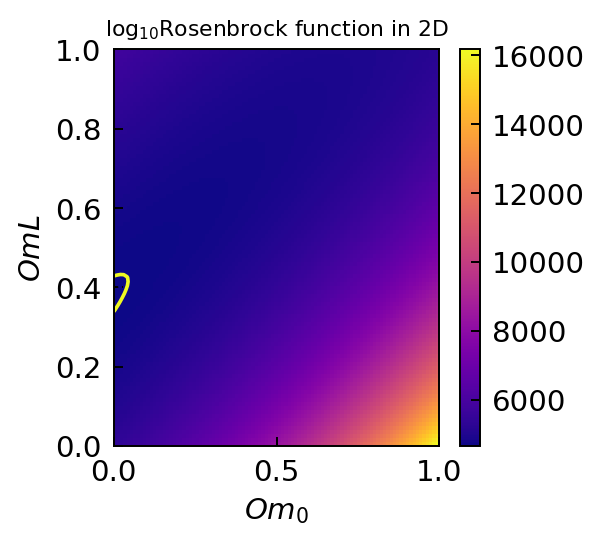

In [113]:
chiSlice = chiGrid[:][:][36]
chi2min = min(chiSlice.flatten())

levs = [chi2min + 3.53, chi2min + 8.03]

plot_color_map(Om0, OmL, chiSlice, xlim=[Om0min,Om0max], ylim=[OmLmin,OmLmax], 
                   xlabel = r'$Om_0$', ylabel = '$OmL$', cmap='plasma', colorbar=True, 
                   plot_title=r'$\rm \log_{10} Rosenbrock\ function\ in\ 2D$', contours=True, 
                   contcmap='plasma', levels=levs,
                   figsize=3.0)